## Importing Python Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/univ_ai

/content/drive/MyDrive/univ_ai


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plot
import xgboost as xgb
import graphviz
from sklearn import preprocessing,model_selection
import itertools

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

## Importing Datasets

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/univ_ai/Training Data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/univ_ai/Test Data.csv")

In [ ]:
print(train_data.shape)
print(test_data.shape)

(252000, 13)
(28000, 12)


In [ ]:
#shuffling the data
from sklearn.utils import shuffle
train_data = shuffle(train_data, random_state=0)

## EDA and Feature Engineering

In [ ]:
train_data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
117955,117956,6460018,75,0,single,rented,no,Computer_operator,Kochi,Kerala,0,14,0
89977,89978,7134812,72,16,single,rented,no,Statistician,Bidhannagar,West_Bengal,4,14,0
86851,86852,8918340,28,13,single,rented,no,Firefighter,Kalyan-Dombivli,Maharashtra,10,14,0
225217,225218,2499535,29,17,single,rented,no,Civil_engineer,Sikar,Rajasthan,9,12,1
186118,186119,270761,48,1,single,rented,no,Fashion_Designer,Ajmer,Rajasthan,1,11,0


In [ ]:
#Checking for null values
print(train_data.isnull().any().sum())
print(test_data.isnull().any().sum())

0
0


In [ ]:
#Imbalanced in classes -> ratio = 7.37/1
print(train_data['risk_flag'].value_counts())

0    221004
1     30996
Name: risk_flag, dtype: int64


In [ ]:
#Unique Values
print(train_data.nunique())
print('*'*50)
print(test_data.nunique())

Id                     252000
income                  41917
age                        59
experience                 21
married                     2
house_ownership             3
car_ownership               2
profession                 51
city                      317
state                      29
current_job_years          15
current_house_years         5
risk_flag                   2
dtype: int64
**************************************************
id                     28000
income                  9916
age                       59
experience                21
married                    2
house_ownership            3
car_ownership              2
profession                51
city                     317
state                     29
current_job_years         15
current_house_years        5
dtype: int64


## Complex Categorical Features

In [ ]:
#large number of categories
train_data[['state', 'city', 'profession']].nunique()

state          29
city          317
profession     51
dtype: int64

In [ ]:
train_data['risk_flag'].mean()

0.123

**Distribution of risk_flag grouped by categories**

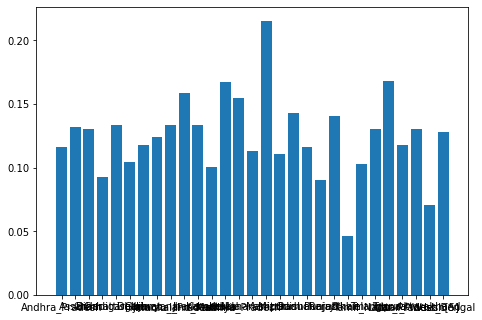

In [ ]:
import matplotlib.pyplot as plt

g_state = train_data.groupby('state')['risk_flag'].agg(['mean', 'count'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(g_state.index,g_state['mean'])
plt.show()

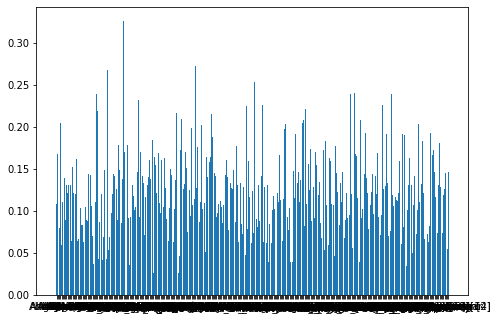

In [ ]:
import matplotlib.pyplot as plt

g_city = train_data.groupby('city')['risk_flag'].agg(['mean', 'count'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(g_city.index,g_city['mean'])
plt.show()

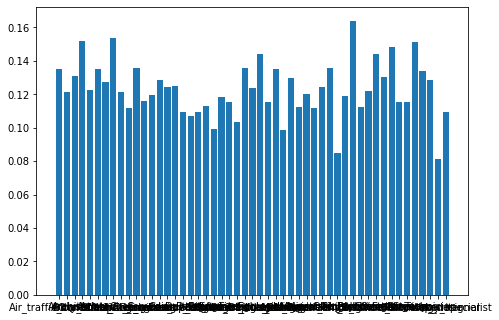

In [ ]:
import matplotlib.pyplot as plt

g_prof = train_data.groupby('profession')['risk_flag'].agg(['mean', 'count'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(g_prof.index,g_prof['mean'])
plt.show()

City shows a lot of variation, state a little but profession not very much



In [ ]:
#Notice that Uttar_Pradesh occurse twice
train_data['state'].unique()

array(['Kerala', 'West_Bengal', 'Maharashtra', 'Rajasthan', 'Bihar',
       'Delhi', 'Andhra_Pradesh', 'Odisha', 'Telangana', 'Mizoram',
       'Uttar_Pradesh', 'Punjab', 'Gujarat', 'Haryana',
       'Himachal_Pradesh', 'Chhattisgarh', 'Jharkhand', 'Puducherry',
       'Karnataka', 'Tamil_Nadu', 'Manipur', 'Assam', 'Jammu_and_Kashmir',
       'Tripura', 'Madhya_Pradesh', 'Chandigarh', 'Uttarakhand',
       'Uttar_Pradesh[5]', 'Sikkim'], dtype=object)

In [ ]:
train_data['state'].replace('Uttar_Pradesh[5]', 'Uttar_Pradesh', inplace=True)

## Cleaning Test Data

In [ ]:
set1 = set(train_data['state'])
set2 = set(test_data['state'])
set1 ^ set2

{'Andhra Pradesh',
 'Andhra_Pradesh',
 'Himachal Pradesh',
 'Himachal_Pradesh',
 'Jammu and Kashmir',
 'Jammu_and_Kashmir',
 'Madhya Pradesh',
 'Madhya_Pradesh',
 'Tamil Nadu',
 'Tamil_Nadu',
 'Uttar Pradesh',
 'Uttar Pradesh[5]',
 'Uttar_Pradesh',
 'West Bengal',
 'West_Bengal'}

In [ ]:
set1 = set(train_data['city'])
set2 = set(test_data['city'])
set1 ^ set2

{'Bhalswa Jahangir Pur',
 'Bhalswa_Jahangir_Pur',
 'Bihar Sharif',
 'Bihar_Sharif',
 'Karawal Nagar',
 'Karawal_Nagar',
 'Khora, Ghaziabad',
 'Khora,_Ghaziabad',
 'Kirari Suleman Nagar',
 'Kirari_Suleman_Nagar',
 'Nangloi Jat',
 'Nangloi_Jat',
 'Navi Mumbai',
 'Navi_Mumbai',
 'New Delhi',
 'New_Delhi',
 'North Dumdum',
 'North_Dumdum',
 'Rajpur Sonarpur',
 'Rajpur_Sonarpur',
 'Raurkela Industrial Township',
 'Raurkela_Industrial_Township',
 'Sangli-Miraj & Kupwad',
 'Sangli-Miraj_&_Kupwad',
 'South Dumdum',
 'South_Dumdum',
 'Sri Ganganagar',
 'Sri_Ganganagar',
 'Sultan Pur Majra',
 'Sultan_Pur_Majra',
 'Surendranagar Dudhrej',
 'Surendranagar_Dudhrej'}

In [ ]:
set1 = set(train_data['profession'])
set2 = set(test_data['profession'])
set1 ^ set2

{'Air traffic controller',
 'Air_traffic_controller',
 'Army officer',
 'Army_officer',
 'Biomedical Engineer',
 'Biomedical_Engineer',
 'Chartered Accountant',
 'Chartered_Accountant',
 'Chemical engineer',
 'Chemical_engineer',
 'Civil engineer',
 'Civil servant',
 'Civil_engineer',
 'Civil_servant',
 'Computer hardware engineer',
 'Computer operator',
 'Computer_hardware_engineer',
 'Computer_operator',
 'Design Engineer',
 'Design_Engineer',
 'Fashion Designer',
 'Fashion_Designer',
 'Financial Analyst',
 'Financial_Analyst',
 'Flight attendant',
 'Flight_attendant',
 'Graphic Designer',
 'Graphic_Designer',
 'Hotel Manager',
 'Hotel_Manager',
 'Industrial Engineer',
 'Industrial_Engineer',
 'Mechanical engineer',
 'Mechanical_engineer',
 'Petroleum Engineer',
 'Petroleum_Engineer',
 'Police officer',
 'Police_officer',
 'Software Developer',
 'Software_Developer',
 'Technical writer',
 'Technical_writer',
 'Technology specialist',
 'Technology_specialist',
 'Web designer',
 'Web_d

In [ ]:
def concat(x):
  return x.replace(' ', '_')

In [ ]:
test_data['state'] = test_data['state'].apply(concat)
test_data['city'] = test_data['city'].apply(concat)
test_data['profession'] = test_data['profession'].apply(concat)

test_data['state'].replace('Uttar_Pradesh[5]', 'Uttar_Pradesh', inplace=True)

In [ ]:
for col in ['state', 'city', 'profession']:

  set1 = set(train_data[col])
  set2 = set(test_data[col])
  print(col,len(set1 ^ set2) )

state 0
city 0
profession 0


## Response Encoding

In [ ]:
res_state = dict(train_data.groupby('state')['risk_flag'].mean())
res_city = dict(train_data.groupby('city')['risk_flag'].mean())
res_prof = dict(train_data.groupby('profession')['risk_flag'].mean())

cat_data1 = pd.DataFrame()
cat_data1['response_state'] = train_data['state'].map(res_state)
cat_data1['response_city'] = train_data['city'].map(res_city)
cat_data1['response_prof'] = train_data['profession'].map(res_prof)

print(cat_data1.shape)
cat_data1.head()

(252000, 3)


,response_state,response_city,response_prof
117955,0.167097,0.252862,0.124048
89977,0.128135,0.178122,0.115570
86851,0.113254,0.086370,0.135789
225217,0.140833,0.238452,0.135832
186118,0.140833,0.138721,0.115385


In [ ]:
#Mapping the learnt values from training data to test 
cat_data1_test = pd.DataFrame()
cat_data1_test['response_state'] = test_data['state'].map(res_state)
cat_data1_test['response_city'] = test_data['city'].map(res_city)
cat_data1_test['response_prof'] = test_data['profession'].map(res_prof)

print(cat_data1_test.shape)
cat_data1_test.head()

(28000, 3)


,response_state,response_city,response_prof
0,0.128135,0.112277,0.144264
1,0.113254,0.108449,0.135789
2,0.113254,0.072746,0.129514
3,0.113254,0.039655,0.121465
4,0.128135,0.148101,0.119604


## Splitting profession into categories

In [ ]:
grp1 = list(g_prof[g_prof['mean'] > 0.123].index)
grp2 = list(set(train_data['profession']) - set(grp1))
cat_data1['prof_cat'] = train_data['profession'].apply(lambda x : 1 if x in grp1 else 0)
cat_data1['risk_flag'] = train_data['risk_flag']

#Transforming Test Data
cat_data1_test['prof_cat'] = test_data['profession'].apply(lambda x : 1 if x in grp1 else 0)

## One Hot Encodings

In [ ]:
state_ohe = pd.get_dummies(train_data['state'], prefix='st')
print(state_ohe.shape)

city_ohe = pd.get_dummies(train_data['city'], prefix='ct')
print(city_ohe.shape)

profession_ohe = pd.get_dummies(train_data['profession'], prefix='prf')
print(profession_ohe.shape)

(252000, 28)
(252000, 317)
(252000, 51)


In [ ]:
state_ohe_test = pd.get_dummies(test_data['state'], prefix='st')
print(state_ohe_test.shape)

city_ohe_test = pd.get_dummies(test_data['city'], prefix='ct')
print(city_ohe_test.shape)

profession_ohe_test = pd.get_dummies(test_data['profession'], prefix='prf')
print(profession_ohe_test.shape)

(28000, 28)
(28000, 317)
(28000, 51)


## Deep Learnt Embeddings

In [ ]:
#function to plot progress 
def plot_metric(history, metric):
  train_metrics = history.history[metric]
  val_metrics = history.history[metric]
  epochs = range(1, len(train_metrics) + 1)
  plt.plot(epochs, train_metrics)
  plt.plot(epochs, val_metrics)
  plt.title('Training and validation '+ metric)
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend(["train_"+metric, 'val_'+metric])
  plt.show()

In [ ]:
X_train = pd.concat([state_ohe, city_ohe, profession_ohe], axis=1).astype('float32')
y_train = train_data['risk_flag']

Epoch 1/15
6300/6300 [==============================] - 23s 3ms/step - loss: 0.3861 - auc: 0.5823 - val_loss: 0.3203 - val_auc: 0.7778
Epoch 2/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.3203 - auc: 0.7682 - val_loss: 0.2774 - val_auc: 0.8466
Epoch 3/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2932 - auc: 0.8217 - val_loss: 0.2649 - val_auc: 0.8614
Epoch 4/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2792 - auc: 0.8426 - val_loss: 0.2611 - val_auc: 0.8652
Epoch 5/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2771 - auc: 0.8520 - val_loss: 0.2597 - val_auc: 0.8682
Epoch 6/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2693 - auc: 0.8604 - val_loss: 0.2583 - val_auc: 0.8711
Epoch 7/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2663 - auc: 0.8643 - val_loss: 0.2580 - val_auc: 0.8717
Epoch 8/15
6300/6300 [==============================] -

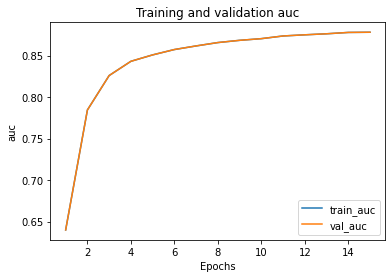

auc: 87.93%
Epoch 1/15
6300/6300 [==============================] - 20s 3ms/step - loss: 0.3874 - auc: 0.5776 - val_loss: 0.3264 - val_auc: 0.7734
Epoch 2/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.3216 - auc: 0.7634 - val_loss: 0.2805 - val_auc: 0.8434
Epoch 3/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2933 - auc: 0.8236 - val_loss: 0.2687 - val_auc: 0.8590
Epoch 4/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2777 - auc: 0.8460 - val_loss: 0.2683 - val_auc: 0.8626
Epoch 5/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2724 - auc: 0.8556 - val_loss: 0.2609 - val_auc: 0.8675
Epoch 6/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2677 - auc: 0.8618 - val_loss: 0.2608 - val_auc: 0.8684
Epoch 7/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2644 - auc: 0.8664 - val_loss: 0.2586 - val_auc: 0.8716
Epoch 8/15
6300/6300 [=====================

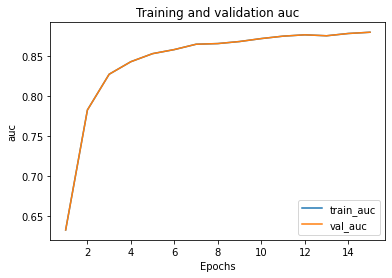

auc: 87.64%
Epoch 1/15
6300/6300 [==============================] - 20s 3ms/step - loss: 0.3845 - auc: 0.5782 - val_loss: 0.3220 - val_auc: 0.7683
Epoch 2/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.3214 - auc: 0.7672 - val_loss: 0.2779 - val_auc: 0.8440
Epoch 3/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2903 - auc: 0.8272 - val_loss: 0.2663 - val_auc: 0.8576
Epoch 4/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2801 - auc: 0.8450 - val_loss: 0.2619 - val_auc: 0.8636
Epoch 5/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2740 - auc: 0.8538 - val_loss: 0.2574 - val_auc: 0.8688
Epoch 6/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2687 - auc: 0.8626 - val_loss: 0.2574 - val_auc: 0.8711
Epoch 7/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2652 - auc: 0.8654 - val_loss: 0.2555 - val_auc: 0.8728
Epoch 8/15
6300/6300 [=====================

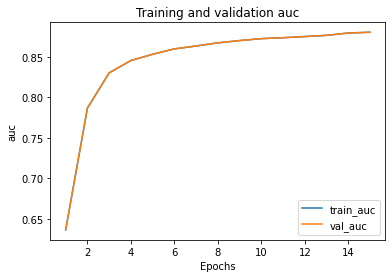

auc: 88.01%
Epoch 1/15
6300/6300 [==============================] - 20s 3ms/step - loss: 0.3936 - auc: 0.5612 - val_loss: 0.3374 - val_auc: 0.7373
Epoch 2/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.3299 - auc: 0.7412 - val_loss: 0.2912 - val_auc: 0.8333
Epoch 3/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2990 - auc: 0.8116 - val_loss: 0.2782 - val_auc: 0.8490
Epoch 4/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2859 - auc: 0.8363 - val_loss: 0.2728 - val_auc: 0.8572
Epoch 5/15
6300/6300 [==============================] - 20s 3ms/step - loss: 0.2793 - auc: 0.8464 - val_loss: 0.2661 - val_auc: 0.8638
Epoch 6/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2733 - auc: 0.8553 - val_loss: 0.2620 - val_auc: 0.8661
Epoch 7/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2674 - auc: 0.8608 - val_loss: 0.2615 - val_auc: 0.8681
Epoch 8/15
6300/6300 [=====================

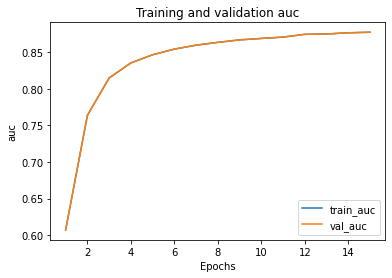

auc: 87.46%
Epoch 1/15
6300/6300 [==============================] - 20s 3ms/step - loss: 0.3768 - auc: 0.5923 - val_loss: 0.3201 - val_auc: 0.7845
Epoch 2/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.3136 - auc: 0.7823 - val_loss: 0.2792 - val_auc: 0.8459
Epoch 3/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2863 - auc: 0.8323 - val_loss: 0.2692 - val_auc: 0.8587
Epoch 4/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2745 - auc: 0.8518 - val_loss: 0.2654 - val_auc: 0.8612
Epoch 5/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2696 - auc: 0.8597 - val_loss: 0.2636 - val_auc: 0.8650
Epoch 6/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2658 - auc: 0.8636 - val_loss: 0.2633 - val_auc: 0.8672
Epoch 7/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.2619 - auc: 0.8666 - val_loss: 0.2607 - val_auc: 0.8676
Epoch 8/15
6300/6300 [=====================

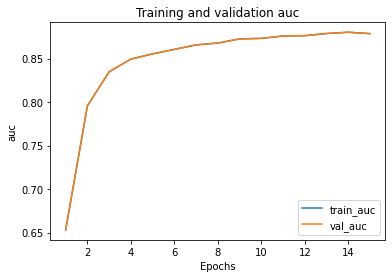

auc: 87.31%
87.67% (+/- 0.27%)


In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cvscores = []
for train, test in kfold.split(X_train, y_train):
  # create model
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(396,)))
  model.add(Dropout(0.3))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
  # Fit the model
  history = model.fit(X_train.loc[train], y_train.loc[train], validation_data=(X_train.loc[test], y_train.loc[test]), epochs=15, batch_size=32, verbose=1)

  #plot progress
  plot_metric(history, 'auc')

  # evaluate the model
  scores = model.evaluate(X_train.loc[test], y_train.loc[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
history

**Final model training**

Epoch 1/30
7875/7875 [==============================] - 20s 2ms/step - loss: 0.3759 - auc: 0.5961
Epoch 2/30
7875/7875 [==============================] - 20s 3ms/step - loss: 0.3070 - auc: 0.7942
Epoch 3/30
7875/7875 [==============================] - 20s 3ms/step - loss: 0.2851 - auc: 0.8350
Epoch 4/30
7875/7875 [==============================] - 20s 3ms/step - loss: 0.2759 - auc: 0.8494
Epoch 5/30
7875/7875 [==============================] - 20s 2ms/step - loss: 0.2705 - auc: 0.8591
Epoch 6/30
7875/7875 [==============================] - 20s 2ms/step - loss: 0.2674 - auc: 0.8623
Epoch 7/30
7875/7875 [==============================] - 20s 3ms/step - loss: 0.2638 - auc: 0.8664
Epoch 8/30
7875/7875 [==============================] - 20s 3ms/step - loss: 0.2637 - auc: 0.8683
Epoch 9/30
7875/7875 [==============================] - 20s 2ms/step - loss: 0.2601 - auc: 0.8734
Epoch 10/30
7875/7875 [==============================] - 20s 3ms/step - loss: 0.2582 - auc: 0.8749
Epoch 11/30
7875/78

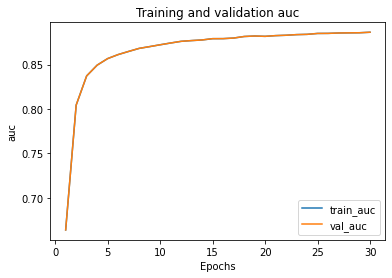

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(396,)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
# Fit the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

#plot progress
plot_metric(history, 'auc')

In [ ]:
#saving the model 
model.save('model1')

INFO:tensorflow:Assets written to: model1/assets


**Loading the model**

In [ ]:
model = tf.keras.models.load_model('model1')

**Testing the model**

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
auc_tr = roc_auc_score(y_train, y_pred_train)
acc_tr = accuracy_score(y_train, np.round(y_pred_train))
print('ROC_AUC train:', auc_tr)
print('acc train:', acc_tr)

ROC_AUC train: 0.9104922124725374
acc train: 0.8931269841269841


[]

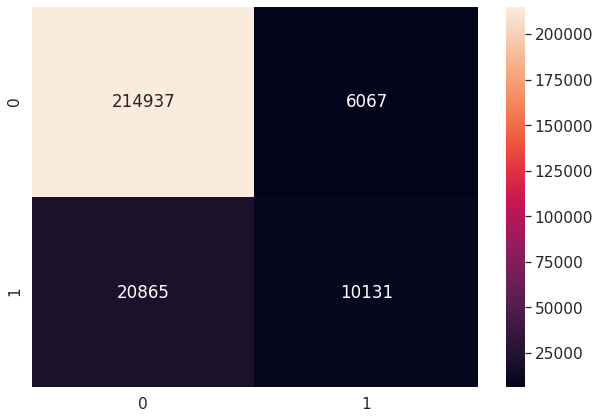

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pylab as pl

cm = confusion_matrix(y_train,np.round(y_pred_train))

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
columns = [i for i in [0,1]])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.plot()

In [ ]:
tp = cm[1][1]
tn = cm[0][0]
fn = cm[1][0]
fp = cm[0][1]
TPR = tp/(tp+fn)
TNR = tn/(tn+fp)
print('TNR', TNR)
print('TPR', TPR)

TNR 0.9725480081808474
TPR 0.32684862562911343


**DL Embeddings Featurization**

In [ ]:
cat_data1['DL_Embeddings'] = model.predict(X_train) 
cat_data1.head()

,response_state,response_city,response_prof,prof_cat,risk_flag,DL_Embeddings
117955,0.167097,0.252862,0.124048,1,0,0.074658
89977,0.128135,0.178122,0.115570,0,0,0.372621
86851,0.113254,0.086370,0.135789,1,0,0.022688
225217,0.140833,0.238452,0.135832,1,1,0.146355
186118,0.140833,0.138721,0.115385,0,0,0.296553


[]

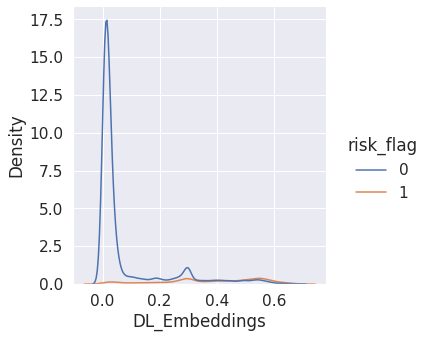

In [ ]:
import seaborn as sns
sns.displot(cat_data1, x="DL_Embeddings", hue="risk_flag", kind="kde")
plt.plot()

[]

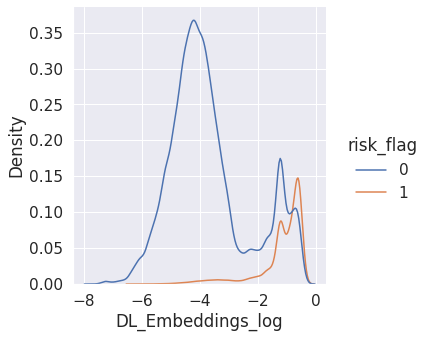

In [ ]:
cat_data1['DL_Embeddings_log'] = cat_data1['DL_Embeddings'].apply(lambda x : np.log(x))

sns.displot(cat_data1, x="DL_Embeddings_log", hue="risk_flag", kind="kde")
plt.plot()

**Distribution of variables**

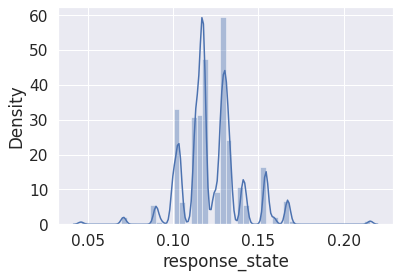

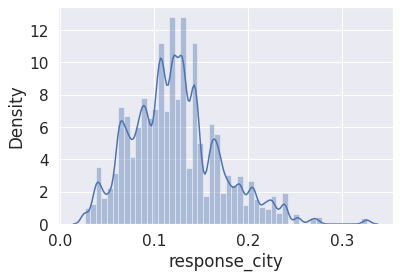

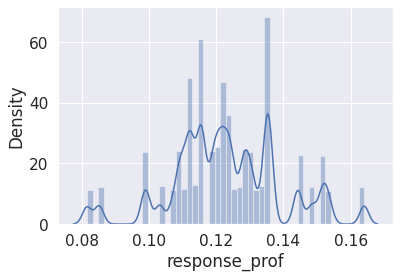

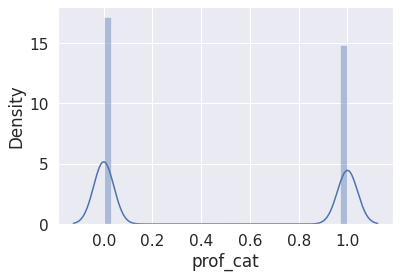

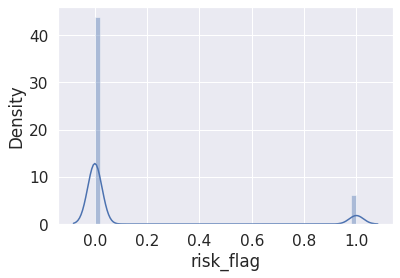

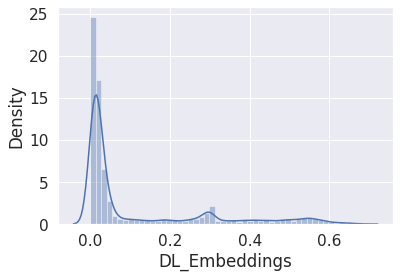

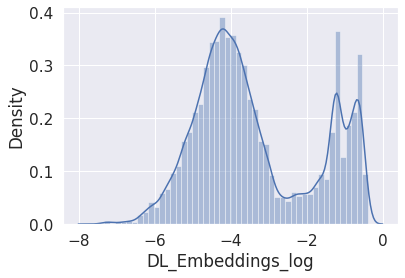

In [ ]:
for col in cat_data1.columns:
    sns.distplot(cat_data1[col])
    plt.show()

**Featurization of Test Data**

In [ ]:
#TEST DATA TRANSFORMATION
temp = pd.concat([state_ohe_test, city_ohe_test, profession_ohe_test], axis=1).astype('float32')

cat_data1_test['DL_Embeddings'] = model.predict(temp) 
cat_data1_test.head()

cat_data1_test['DL_Embeddings_log'] = cat_data1_test['DL_Embeddings'].apply(lambda x : np.log(x))

print(cat_data1.shape)
print(cat_data1_test.shape)

(252000, 7)
(28000, 6)


In [ ]:
cat_data1.head()

,response_state,response_city,response_prof,prof_cat,risk_flag,DL_Embeddings,DL_Embeddings_log
117955,0.167097,0.252862,0.124048,1,0,0.074658,-2.594838
89977,0.128135,0.178122,0.115570,0,0,0.372621,-0.987193
86851,0.113254,0.086370,0.135789,1,0,0.022688,-3.785937
225217,0.140833,0.238452,0.135832,1,1,0.146355,-1.921718
186118,0.140833,0.138721,0.115385,0,0,0.296553,-1.215529


## Simple Categorical Features

**One Hot Encodings**

In [ ]:
married_ohe = pd.get_dummies(train_data['married'])
print(married_ohe.shape)
married_ohe.head()

(252000, 2)


,married,single
117955,0,1
89977,0,1
86851,0,1
225217,0,1
186118,0,1


In [ ]:
house_ohe = pd.get_dummies(train_data['house_ownership'], prefix='house')
print(house_ohe.shape)
house_ohe.head()

(252000, 3)


,house_norent_noown,house_owned,house_rented
117955,0,0,1
89977,0,0,1
86851,0,0,1
225217,0,0,1
186118,0,0,1


In [ ]:
car_ohe = pd.get_dummies(train_data['car_ownership'], prefix='car')
print(car_ohe.shape)
car_ohe.head()

(252000, 2)


,car_no,car_yes
117955,1,0
89977,1,0
86851,1,0
225217,1,0
186118,1,0


**For Test Data**

In [ ]:
married_ohe_test = pd.get_dummies(test_data['married'])
print(married_ohe_test.shape)

house_ohe_test = pd.get_dummies(test_data['house_ownership'], prefix='house')
print(house_ohe_test.shape)

car_ohe_test = pd.get_dummies(test_data['car_ownership'], prefix='car')
print(car_ohe_test.shape)

(28000, 2)
(28000, 3)
(28000, 2)


## Numerical Features

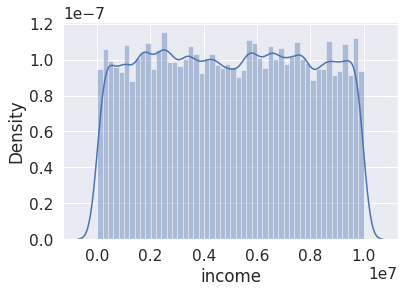

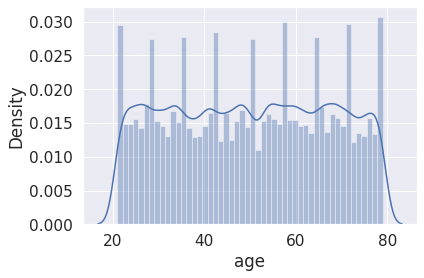

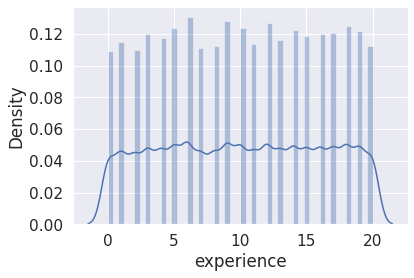

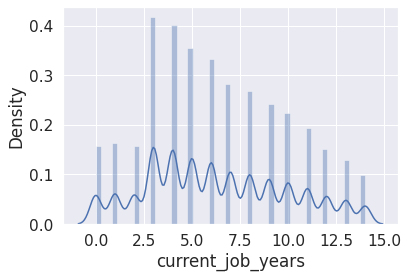

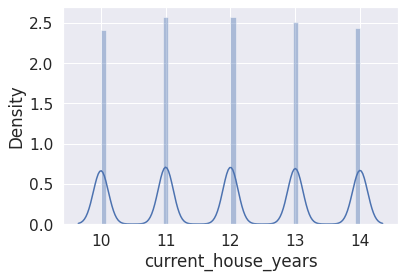

In [ ]:
num_cols = ['income', 'age', 'experience', 'current_job_years', 'current_house_years']

for each in num_cols:
    sns.distplot(train_data[each])
    plt.show()

In [ ]:
num_cols = ['income', 'age', 'experience', 'current_job_years', 'current_house_years']

#num_data1 is raw numerical data
num_data1 = train_data[num_cols].copy()
num_data1.head()

,income,age,experience,current_job_years,current_house_years
117955,6460018,75,0,0,14
89977,7134812,72,16,4,14
86851,8918340,28,13,10,14
225217,2499535,29,17,9,12
186118,270761,48,1,1,11


In [ ]:
#Test Data
num_data1_test = test_data[num_cols].copy()

## Column False Values

In [ ]:
zero_exp = num_data1[num_data1['experience']==0]
print(len(zero_exp))
zero_exp.head()

11043


,income,age,experience,current_job_years,current_house_years
117955,6460018,75,0,0,14
68126,4386483,37,0,0,11
100391,8683216,21,0,0,12
18717,5574828,74,0,0,10
140561,2433481,48,0,0,14


In [ ]:
len(zero_exp[zero_exp['age']>40])

7298

In [ ]:
len(zero_exp[zero_exp['current_job_years']==0])

11043

In [ ]:
len(num_data1[num_data1['current_job_years']==0])

11043

In [ ]:
len(num_data1[num_data1['current_house_years']==0])

0

In [ ]:
#Test Data
len(num_data1_test[num_data1_test['experience']==0])

1249

**Filling the values**

In [ ]:
#Replacing the zero with null values 
num_data1[['experience','current_job_years']] = num_data1[['experience','current_job_years']].replace(0, np.nan)

#Filling the null values with mean grouped by age
num_data1["experience"] = num_data1[['experience', 'age']].groupby("age").transform(lambda x: x.fillna(np.round(x.mean())))
num_data1["current_job_years"] = num_data1[['current_job_years', 'age']].groupby("age").transform(lambda x: x.fillna(np.round(x.mean())))

In [ ]:
#Replacing the zero with null values 
num_data1_test[['experience','current_job_years']] = num_data1_test[['experience','current_job_years']].replace(0, np.nan)

#Filling the null values with mean grouped by age
num_data1_test["experience"] = num_data1_test[['experience', 'age']].groupby("age").transform(lambda x: x.fillna(np.round(x.mean())))
num_data1_test["current_job_years"] = num_data1_test[['current_job_years', 'age']].groupby("age").transform(lambda x: x.fillna(np.round(x.mean())))

num_data1.head()

,income,age,experience,current_job_years,current_house_years
117955,6460018,75,11.0,7.0,14
89977,7134812,72,16.0,4.0,14
86851,8918340,28,13.0,10.0,14
225217,2499535,29,17.0,9.0,12
186118,270761,48,1.0,1.0,11


## Further Feature Engineering

In [ ]:
num_data1['inc_by_age'] = num_data1['income'] / num_data1['age']
num_data1['inc_by_exp'] = num_data1['income'] / num_data1['experience']
num_data1['age_by_exp'] = num_data1['age'] / num_data1['experience']
num_data1['age_minus_exp'] = num_data1['age'] - num_data1['experience']
num_data1['chy_minus_exp'] = num_data1['current_house_years'] - num_data1['experience']
num_data1['exp_minus_cjy'] = num_data1['experience'] - num_data1['current_job_years']

num_data1.head()

,income,age,experience,current_job_years,current_house_years,inc_by_age,inc_by_exp,age_by_exp,age_minus_exp,chy_minus_exp,exp_minus_cjy
117955,6460018,75,11.0,7.0,14,86133.573333,587274.363636,6.818182,64.0,3.0,4.0
89977,7134812,72,16.0,4.0,14,99094.611111,445925.750000,4.500000,56.0,-2.0,12.0
86851,8918340,28,13.0,10.0,14,318512.142857,686026.153846,2.153846,15.0,1.0,3.0
225217,2499535,29,17.0,9.0,12,86190.862069,147031.470588,1.705882,12.0,-5.0,8.0
186118,270761,48,1.0,1.0,11,5640.854167,270761.000000,48.000000,47.0,10.0,0.0


In [ ]:
num_data1_test['inc_by_age'] = num_data1_test['income'] / num_data1_test['age']
num_data1_test['inc_by_exp'] = num_data1_test['income'] / num_data1_test['experience']
num_data1_test['age_by_exp'] = num_data1_test['age'] / num_data1_test['experience']
num_data1_test['age_minus_exp'] = num_data1_test['age'] - num_data1_test['experience']
num_data1_test['chy_minus_exp'] = num_data1_test['current_house_years'] - num_data1_test['experience']
num_data1_test['exp_minus_cjy'] = num_data1_test['experience'] - num_data1_test['current_job_years']

num_data1_test.head()

,income,age,experience,current_job_years,current_house_years,inc_by_age,inc_by_exp,age_by_exp,age_minus_exp,chy_minus_exp,exp_minus_cjy
0,7393090,59,19.0,4.0,13,125306.610169,389110.000000,3.105263,40.0,-6.0,15.0
1,1215004,25,5.0,5.0,10,48600.160000,243000.800000,5.000000,20.0,5.0,0.0
2,8901342,50,12.0,9.0,14,178026.840000,741778.500000,4.166667,38.0,2.0,3.0
3,1944421,49,9.0,3.0,12,39682.061224,216046.777778,5.444444,40.0,3.0,6.0
4,13429,25,18.0,13.0,11,537.160000,746.055556,1.388889,7.0,-7.0,5.0


**Group by age to see if there is any pattern in risk_flag wrt age**

    age      mean  count
0    21  0.142212   4205
1    22  0.173815   4430
2    23  0.124017   4322
3    24  0.145862   4326
4    25  0.128549   4543
5    26  0.173003   4156
6    27  0.138541   5197
7    28  0.154319   3901
8    29  0.138477   4109
9    30  0.131826   4468
10   31  0.124736   4257
11   32  0.129890   3834
12   33  0.146109   4921
13   34  0.080199   4414
14   35  0.110465   4644
15   36  0.131862   3443
16   37  0.126655   4153
17   38  0.129185   3793
18   39  0.109737   3800
19   40  0.087408   4233
20   41  0.118086   4827
21   42  0.125544   4134
22   43  0.103661   4206
23   44  0.107123   3622
24   45  0.122555   4806
25   46  0.149711   3627
26   47  0.137408   4483
27   48  0.116368   4967
28   49  0.105401   4203
29   50  0.118945   4624
30   51  0.113335   3397
31   52  0.115734   3197
32   53  0.111581   4490
33   54  0.137931   4785
34   55  0.127548   4563
35   56  0.118554   4344
36   57  0.120847   4394
37   58  0.105998   4368
38   59  0.131392   4498


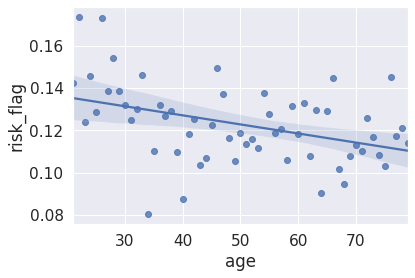

In [ ]:
num_data1['risk_flag'] = train_data['risk_flag']
grouped_df = num_data1.groupby('age')
risk_age = grouped_df['risk_flag'].aggregate([np.mean,'count']).reset_index()
print(risk_age)
risk_age.columns =['age','risk_flag','count']
sns.regplot(x='age',y='risk_flag',data=risk_age)
plt.show()

## Concatenation into X_train and X_test

In [ ]:
X_train = pd.concat([num_data1, 
                     cat_data1,
                     married_ohe, 
                     house_ohe, 
                     car_ohe], axis=1)
X_train = X_train.drop(['risk_flag'], axis=1)
y_train = train_data['risk_flag']

print(X_train.shape)
print(y_train.shape)
X_train.head()

(252000, 24)
(252000,)


,income,age,experience,current_job_years,current_house_years,inc_by_age,inc_by_exp,age_by_exp,age_minus_exp,chy_minus_exp,exp_minus_cjy,response_state,response_city,response_prof,prof_cat,DL_Embeddings,DL_Embeddings_log,married,single,house_norent_noown,house_owned,house_rented,car_no,car_yes
117955,6460018,75,11.0,7.0,14,86133.573333,587274.363636,6.818182,64.0,3.0,4.0,0.167097,0.252862,0.124048,1,0.074658,-2.594838,0,1,0,0,1,1,0
89977,7134812,72,16.0,4.0,14,99094.611111,445925.750000,4.500000,56.0,-2.0,12.0,0.128135,0.178122,0.115570,0,0.372621,-0.987193,0,1,0,0,1,1,0
86851,8918340,28,13.0,10.0,14,318512.142857,686026.153846,2.153846,15.0,1.0,3.0,0.113254,0.086370,0.135789,1,0.022688,-3.785937,0,1,0,0,1,1,0
225217,2499535,29,17.0,9.0,12,86190.862069,147031.470588,1.705882,12.0,-5.0,8.0,0.140833,0.238452,0.135832,1,0.146355,-1.921718,0,1,0,0,1,1,0
186118,270761,48,1.0,1.0,11,5640.854167,270761.000000,48.000000,47.0,10.0,0.0,0.140833,0.138721,0.115385,0,0.296553,-1.215529,0,1,0,0,1,1,0


In [ ]:
X_test = pd.concat([num_data1_test, 
                    cat_data1_test,
                    married_ohe_test, 
                    house_ohe_test, 
                    car_ohe_test], axis=1)

print(X_test.shape)
X_test.head()

(28000, 24)


,income,age,experience,current_job_years,current_house_years,inc_by_age,inc_by_exp,age_by_exp,age_minus_exp,chy_minus_exp,exp_minus_cjy,response_state,response_city,response_prof,prof_cat,DL_Embeddings,DL_Embeddings_log,married,single,house_norent_noown,house_owned,house_rented,car_no,car_yes
0,7393090,59,19.0,4.0,13,125306.610169,389110.000000,3.105263,40.0,-6.0,15.0,0.128135,0.112277,0.144264,1,0.012509,-4.381308,0,1,0,0,1,1,0
1,1215004,25,5.0,5.0,10,48600.160000,243000.800000,5.000000,20.0,5.0,0.0,0.113254,0.108449,0.135789,1,0.294946,-1.220964,0,1,0,0,1,1,0
2,8901342,50,12.0,9.0,14,178026.840000,741778.500000,4.166667,38.0,2.0,3.0,0.113254,0.072746,0.129514,1,0.158755,-1.840392,0,1,0,0,1,1,0
3,1944421,49,9.0,3.0,12,39682.061224,216046.777778,5.444444,40.0,3.0,6.0,0.113254,0.039655,0.121465,0,0.041016,-3.193792,1,0,0,0,1,0,1
4,13429,25,18.0,13.0,11,537.160000,746.055556,1.388889,7.0,-7.0,5.0,0.128135,0.148101,0.119604,0,0.023196,-3.763759,0,1,0,0,1,0,1


## Modelling

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Standard plotly imports
#import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
#import cufflinks
#import cufflinks as cf
import plotly.figure_factory as ff

# Using plotly + cufflinks in offline mode
init_notebook_mode(connected=True)
#cufflinks.go_offline(connected=True)

# Preprocessing, modelling and evaluating
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from xgboost import XGBClassifier
import xgboost as xgb

## Hyperopt modules
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from functools import partial

import os
import gc

import datetime

## XGBoost

**Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import KFold,TimeSeriesSplit
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.metrics import make_scorer

In [ ]:
import time
def objective(params):
    time1 = time.time()
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'subsample': "{:.2f}".format(params['subsample']),
        'reg_alpha': "{:.3f}".format(params['reg_alpha']),
        'reg_lambda': "{:.3f}".format(params['reg_lambda']),
        'learning_rate': "{:.3f}".format(params['learning_rate']),
        'num_leaves': '{:.3f}'.format(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'min_child_samples': '{:.3f}'.format(params['min_child_samples']),
        'feature_fraction': '{:.3f}'.format(params['feature_fraction']),
        'bagging_fraction': '{:.3f}'.format(params['bagging_fraction'])
    }

    print("\n############## New Run ################")
    print(f"params = {params}")
    FOLDS = 5
    count=1
    skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)

    tss = TimeSeriesSplit(n_splits=FOLDS)
    # y_preds = np.zeros(sample_submission.shape[0])
    y_oof = np.zeros(X_train.shape[0])
    score_mean = 0
    for tr_idx, val_idx in tss.split(X_train, y_train):
        clf = xgb.XGBClassifier(
            scale_pos_weight = 7.13,  
            n_estimators=300, random_state=4, verbose=True, 
            tree_method='gpu_hist', 
            **params
        )

        X_tr, X_vl = X_train.iloc[tr_idx, :], X_train.iloc[val_idx, :]
        y_tr, y_vl = y_train.iloc[tr_idx], y_train.iloc[val_idx]
        
        clf.fit(X_tr, y_tr)
        #y_pred_train = clf.predict_proba(X_vl)[:,1]
        #print(y_pred_train)
        score = make_scorer(roc_auc_score, needs_proba=True)(clf, X_vl, y_vl)
        # plt.show()
        score_mean += score
        print(f'{count} CV - score: {round(score, 4)}')
        count += 1
    time2 = time.time() - time1
    print(f"Total Time Run: {round(time2 / 60,2)}")
    gc.collect()
    print(f'Mean ROC_AUC: {score_mean / FOLDS}')
    del X_tr, X_vl, y_tr, y_vl, clf, score
    return -(score_mean / FOLDS)


space = {
    # The maximum depth of a tree, same as GBM.
    # Used to control over-fitting as higher depth will allow model 
    # to learn relations very specific to a particular sample.
    # Should be tuned using CV.
    # Typical values: 3-10
    'max_depth': hp.quniform('max_depth', 7, 23, 1),
    
    # reg_alpha: L1 regularization term. L1 regularization encourages sparsity 
    # (meaning pulling weights to 0). It can be more useful when the objective
    # is logistic regression since you might need help with feature selection.
    'reg_alpha':  hp.uniform('reg_alpha', 0.01, 0.4),
    
    # reg_lambda: L2 regularization term. L2 encourages smaller weights, this
    # approach can be more useful in tree-models where zeroing 
    # features might not make much sense.
    'reg_lambda': hp.uniform('reg_lambda', 0.01, .4),
    
    # eta: Analogous to learning rate in GBM
    # Makes the model more robust by shrinking the weights on each step
    # Typical final values to be used: 0.01-0.2
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    
    # colsample_bytree: Similar to max_features in GBM. Denotes the 
    # fraction of columns to be randomly samples for each tree.
    # Typical values: 0.5-1
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, .9),
    
    # A node is split only when the resulting split gives a positive
    # reduction in the loss function. Gamma specifies the 
    # minimum loss reduction required to make a split.
    # Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
    'gamma': hp.uniform('gamma', 0.01, .7),
    
    # more increases accuracy, but may lead to overfitting.
    # num_leaves: the number of leaf nodes to use. Having a large number 
    # of leaves will improve accuracy, but will also lead to overfitting.
    'num_leaves': hp.choice('num_leaves', list(range(20, 250, 10))),
    
    # specifies the minimum samples per leaf node.
    # the minimum number of samples (data) to group into a leaf. 
    # The parameter can greatly assist with overfitting: larger sample
    # sizes per leaf will reduce overfitting (but may lead to under-fitting).
    'min_child_samples': hp.choice('min_child_samples', list(range(100, 250, 10))),
    
    # subsample: represents a fraction of the rows (observations) to be 
    # considered when building each subtree. Tianqi Chen and Carlos Guestrin
    # in their paper A Scalable Tree Boosting System recommend 
    'subsample': hp.choice('subsample', [0.2, 0.4, 0.5, 0.6, 0.7, .8, .9]),
    
    # randomly select a fraction of the features.
    # feature_fraction: controls the subsampling of features used
    # for training (as opposed to subsampling the actual training data in 
    # the case of bagging). Smaller fractions reduce overfitting.
    'feature_fraction': hp.uniform('feature_fraction', 0.4, .8),
    
    # randomly bag or subsample training data.
    'bagging_fraction': hp.uniform('bagging_fraction', 0.4, .9)
    
    # bagging_fraction and bagging_freq: enables bagging (subsampling) 
    # of the training data. Both values need to be set for bagging to be used.
    # The frequency controls how often (iteration) bagging is used. Smaller
    # fractions and frequencies reduce overfitting.
}

In [ ]:
# Set algoritm parameters
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=27)

# Print best parameters
best_params = space_eval(space, best)
                                                    
############## New R


############## New Run ################
params = {'max_depth': 18, 'gamma': '0.610', 'subsample': '0.20', 'reg_alpha': '0.133', 'reg_lambda': '0.046', 'learning_rate': '0.121', 'num_leaves': '30.000', 'colsample_bytree': '0.556', 'min_child_samples': '230.000', 'feature_fraction': '0.533', 'bagging_fraction': '0.729'}
1 CV - score: 0.9036
2 CV - score: 0.9159
3 CV - score: 0.9254
4 CV - score: 0.9282
5 CV - score: 0.9331
Total Time Run: 1.86
Mean ROC_AUC: 0.9212292322747064

############## New Run ################
params = {'max_depth': 11, 'gamma': '0.119', 'subsample': '0.80', 'reg_alpha': '0.140', 'reg_lambda': '0.266', 'learning_rate': '0.098', 'num_leaves': '60.000', 'colsample_bytree': '0.833', 'min_child_samples': '160.000', 'feature_fraction': '0.710', 'bagging_fraction': '0.639'}
1 CV - score: 0.9224
2 CV - score: 0.9275
3 CV - score: 0.9339
4 CV - score: 0.9352
5 CV - score: 0.9385
Total Time Run: 0.77
Mean ROC_AUC: 0.9315028361336786

############## New Run ################

In [ ]:
print("BEST PARAMS: ", best_params)

BEST PARAMS:  {'bagging_fraction': 0.6772907000147506, 'colsample_bytree': 0.4556825520432889, 'feature_fraction': 0.6740386051057667, 'gamma': 0.5314894348729933, 'learning_rate': 0.011725955367278119, 'max_depth': 19.0, 'min_child_samples': 160, 'num_leaves': 40, 'reg_alpha': 0.012810624868367496, 'reg_lambda': 0.10189369646652095, 'subsample': 0.5}


In [ ]:
best_params = {'scale_pos_weight':7.13, 'n_estimators':600, 'tree_method':'gpu_hist', 'bagging_fraction': 0.7829240572460123, 'colsample_bytree': 0.3237808947593247, 'feature_fraction': 0.6482655065042875, 'gamma': 0.3861911350718314, 'learning_rate': 0.01832454911948826, 'max_depth': 23, 'min_child_samples': 210, 'num_leaves': 160, 'reg_alpha': 0.14634272241140253, 'reg_lambda': 0.13253874360289158, 'subsample': 0.6}

clf = xgb.XGBClassifier(  
    **best_params,
)


In [ ]:
data_dmat = xgb.DMatrix(data=X_train, label=y_train)
rounds = 60

result = xgb.cv(params=best_params, dtrain=data_dmat, nfold=5, stratified=True, metrics='auc', num_boost_round=rounds, early_stopping_rounds=5, verbose_eval=3, as_pandas=True, seed=23333)
print(result)

[0]	train-auc:0.947315+0.000574602	test-auc:0.905737+0.00235434
[3]	train-auc:0.961488+0.000157613	test-auc:0.928105+0.00120744
[6]	train-auc:0.960857+0.00016757	test-auc:0.935222+0.00138766
[9]	train-auc:0.960429+0.000149132	test-auc:0.93706+0.00145414
[12]	train-auc:0.960388+0.000164575	test-auc:0.938605+0.00128467
[15]	train-auc:0.960351+0.00017376	test-auc:0.939621+0.00140265
[18]	train-auc:0.960181+0.000145891	test-auc:0.940477+0.00134193
[21]	train-auc:0.960142+0.00014732	test-auc:0.941019+0.00123728
[24]	train-auc:0.960103+0.000151899	test-auc:0.94131+0.00118875
[27]	train-auc:0.959916+0.000155441	test-auc:0.941572+0.00118169
[30]	train-auc:0.959958+0.000157255	test-auc:0.941813+0.00112157
[33]	train-auc:0.960022+0.000159412	test-auc:0.94199+0.0011434
[36]	train-auc:0.960042+0.000162844	test-auc:0.942067+0.00109265
[39]	train-auc:0.960128+0.000166258	test-auc:0.942129+0.00107333
[42]	train-auc:0.960174+0.000162578	test-auc:0.942208+0.00105714
[45]	train-auc:0.960225+0.000157813	

In [ ]:
best_params = {'scale_pos_weight':7.13, 'n_estimators':60, 'tree_method':'gpu_hist', 'bagging_fraction': 0.7829240572460123, 'colsample_bytree': 0.3237808947593247, 'feature_fraction': 0.6482655065042875, 'gamma': 0.3861911350718314, 'learning_rate': 0.01832454911948826, 'max_depth': 23, 'min_child_samples': 210, 'num_leaves': 160, 'reg_alpha': 0.14634272241140253, 'reg_lambda': 0.13253874360289158, 'subsample': 0.6}

clf = xgb.XGBClassifier(
    **best_params
)
clf.fit(X_train, y_train)

XGBClassifier(bagging_fraction=0.7829240572460123, base_score=0.5,
              booster='gbtree', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.3237808947593247,
              feature_fraction=0.6482655065042875, gamma=0.3861911350718314,
              learning_rate=0.01832454911948826, max_delta_step=0, max_depth=23,
              min_child_samples=210, min_child_weight=1, missing=None,
              n_estimators=60, n_jobs=1, nthread=None, num_leaves=160,
              objective='binary:logistic', random_state=0,
              reg_alpha=0.14634272241140253, reg_lambda=0.13253874360289158,
              scale_pos_weight=7.13, seed=None, silent=None, subsample=0.6,
              tree_method='gpu_hist', verbosity=1)

In [ ]:
feature_important = clf.get_booster().get_score(importance_type="weight")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

# Top 10 features
data.head(20)

,score
inc_by_exp,30573
inc_by_age,27521
response_city,23223
income,22440
response_state,22355
age_by_exp,18112
response_prof,16779
age,16278
DL_Embeddings,15335
chy_minus_exp,14162


In [ ]:
y_pred_train = clf.predict_proba(X_train)
y_pred_train = y_pred_train[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
auc_tr = roc_auc_score(y_train, y_pred_train)
acc_tr = accuracy_score(y_train, np.round(y_pred_train))
print('ROC AUC train:', auc_tr)
print('acc train:', acc_tr)

ROC AUC train: 0.9592359229527396
acc train: 0.9220873015873016


[]

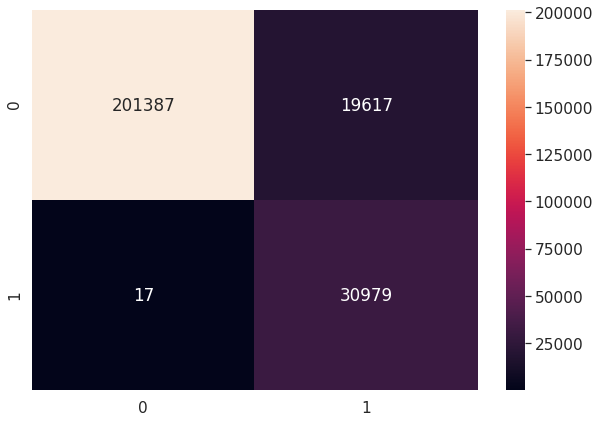

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pylab as pl

cm = confusion_matrix(y_train,y_pred_train>0.5)

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
columns = [i for i in [0,1]])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.plot()

In [ ]:
tp = cm[1][1]
tn = cm[0][0]
fn = cm[1][0]
fp = cm[0][1]
TPR = tp/(tp+fn)
TNR = tn/(tn+fp)
print('TNR', TNR)
print('TPR', TPR)

TNR 0.9112369006895803
TPR 0.999451542134469


## Predictions on Test Data

In [ ]:
X_test.head()

,income,age,experience,current_job_years,current_house_years,inc_by_age,inc_by_exp,age_by_exp,age_minus_exp,chy_minus_exp,exp_minus_cjy,response_state,response_city,response_prof,prof_cat,DL_Embeddings,DL_Embeddings_log,married,single,house_norent_noown,house_owned,house_rented,car_no,car_yes
0,7393090,59,19.0,4.0,13,125306.610169,389110.000000,3.105263,40.0,-6.0,15.0,0.128135,0.112277,0.144264,1,0.012509,-4.381308,0,1,0,0,1,1,0
1,1215004,25,5.0,5.0,10,48600.160000,243000.800000,5.000000,20.0,5.0,0.0,0.113254,0.108449,0.135789,1,0.294946,-1.220964,0,1,0,0,1,1,0
2,8901342,50,12.0,9.0,14,178026.840000,741778.500000,4.166667,38.0,2.0,3.0,0.113254,0.072746,0.129514,1,0.158755,-1.840392,0,1,0,0,1,1,0
3,1944421,49,9.0,3.0,12,39682.061224,216046.777778,5.444444,40.0,3.0,6.0,0.113254,0.039655,0.121465,0,0.041016,-3.193792,1,0,0,0,1,0,1
4,13429,25,18.0,13.0,11,537.160000,746.055556,1.388889,7.0,-7.0,5.0,0.128135,0.148101,0.119604,0,0.023196,-3.763759,0,1,0,0,1,0,1


In [ ]:
X_train.head()

,income,age,experience,current_job_years,current_house_years,inc_by_age,inc_by_exp,age_by_exp,age_minus_exp,chy_minus_exp,exp_minus_cjy,response_state,response_city,response_prof,prof_cat,DL_Embeddings,DL_Embeddings_log,married,single,house_norent_noown,house_owned,house_rented,car_no,car_yes
117955,6460018,75,11.0,7.0,14,86133.573333,587274.363636,6.818182,64.0,3.0,4.0,0.167097,0.252862,0.124048,1,0.074658,-2.594838,0,1,0,0,1,1,0
89977,7134812,72,16.0,4.0,14,99094.611111,445925.750000,4.500000,56.0,-2.0,12.0,0.128135,0.178122,0.115570,0,0.372621,-0.987193,0,1,0,0,1,1,0
86851,8918340,28,13.0,10.0,14,318512.142857,686026.153846,2.153846,15.0,1.0,3.0,0.113254,0.086370,0.135789,1,0.022688,-3.785937,0,1,0,0,1,1,0
225217,2499535,29,17.0,9.0,12,86190.862069,147031.470588,1.705882,12.0,-5.0,8.0,0.140833,0.238452,0.135832,1,0.146355,-1.921718,0,1,0,0,1,1,0
186118,270761,48,1.0,1.0,11,5640.854167,270761.000000,48.000000,47.0,10.0,0.0,0.140833,0.138721,0.115385,0,0.296553,-1.215529,0,1,0,0,1,1,0


In [ ]:
best_params = {'scale_pos_weight':7.13, 'n_estimators':60, 'tree_method':'gpu_hist', 'bagging_fraction': 0.7829240572460123, 'colsample_bytree': 0.3237808947593247, 'feature_fraction': 0.6482655065042875, 'gamma': 0.3861911350718314, 'learning_rate': 0.01832454911948826, 'max_depth': 23, 'min_child_samples': 210, 'num_leaves': 160, 'reg_alpha': 0.14634272241140253, 'reg_lambda': 0.13253874360289158, 'subsample': 0.6}
clf = xgb.XGBClassifier(
    **best_params
)
clf.fit(X_train, y_train)

XGBClassifier(bagging_fraction=0.7829240572460123, base_score=0.5,
              booster='gbtree', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.3237808947593247,
              feature_fraction=0.6482655065042875, gamma=0.3861911350718314,
              learning_rate=0.01832454911948826, max_delta_step=0, max_depth=23,
              min_child_samples=210, min_child_weight=1, missing=None,
              n_estimators=60, n_jobs=1, nthread=None, num_leaves=160,
              objective='binary:logistic', random_state=0,
              reg_alpha=0.14634272241140253, reg_lambda=0.13253874360289158,
              scale_pos_weight=7.13, seed=None, silent=None, subsample=0.6,
              tree_method='gpu_hist', verbosity=1)

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
prediction_dataset = pd.DataFrame(y_test_pred)
prediction_dataset['id'] = test_data['id']
prediction_dataset.rename(columns={0:'risk_flag'}, inplace=True)
prediction_dataset = prediction_dataset[['id', 'risk_flag']]
prediction_dataset.head()

,id,risk_flag
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
prediction_dataset = prediction_dataset[['id', 'risk_flag']]
prediction_dataset.head()

,id,risk_flag
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
prediction_dataset = prediction_dataset.astype(int)
prediction_dataset.dtypes
prediction_dataset.to_csv('submission2.csv', index=False)

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train)
df = pd.DataFrame(x_scaled)

Epoch 1/15
6300/6300 [==============================] - 20s 3ms/step - loss: 18756.4622 - auc: 0.4933 - val_loss: 0.3719 - val_auc: 0.5000
Epoch 2/15
6300/6300 [==============================] - 19s 3ms/step - loss: 4.7773 - auc: 0.4999 - val_loss: 0.3719 - val_auc: 0.5000
Epoch 3/15
6300/6300 [==============================] - 19s 3ms/step - loss: 2.1792 - auc: 0.4989 - val_loss: 0.3719 - val_auc: 0.5000
Epoch 4/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.4704 - auc: 0.4982 - val_loss: 0.3719 - val_auc: 0.5000
Epoch 5/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.3899 - auc: 0.5009 - val_loss: 0.3720 - val_auc: 0.5000
Epoch 6/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.4379 - auc: 0.4982 - val_loss: 0.3719 - val_auc: 0.5000
Epoch 7/15
6300/6300 [==============================] - 19s 3ms/step - loss: 1.9613 - auc: 0.4998 - val_loss: 0.3719 - val_auc: 0.5000
Epoch 8/15
6300/6300 [=============================

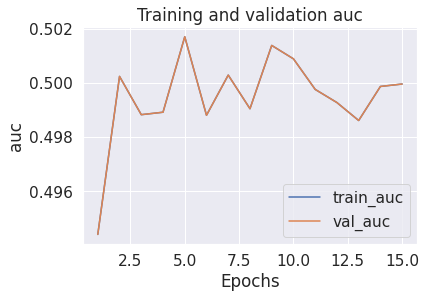

auc: 50.00%
Epoch 1/15
6300/6300 [==============================] - 20s 3ms/step - loss: 16589.2525 - auc: 0.4967 - val_loss: 0.3742 - val_auc: 0.5000
Epoch 2/15
6300/6300 [==============================] - 19s 3ms/step - loss: 2.1094 - auc: 0.4987 - val_loss: 0.3742 - val_auc: 0.5000
Epoch 3/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.4115 - auc: 0.4977 - val_loss: 0.3742 - val_auc: 0.5000
Epoch 4/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.6818 - auc: 0.4987 - val_loss: 0.3742 - val_auc: 0.5000
Epoch 5/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.3939 - auc: 0.4986 - val_loss: 0.3742 - val_auc: 0.5000
Epoch 6/15
6300/6300 [==============================] - 20s 3ms/step - loss: 0.3710 - auc: 0.4992 - val_loss: 0.3742 - val_auc: 0.5000
Epoch 7/15
6300/6300 [==============================] - 20s 3ms/step - loss: 0.3728 - auc: 0.4992 - val_loss: 0.3743 - val_auc: 0.5000
Epoch 8/15
6300/6300 [=================

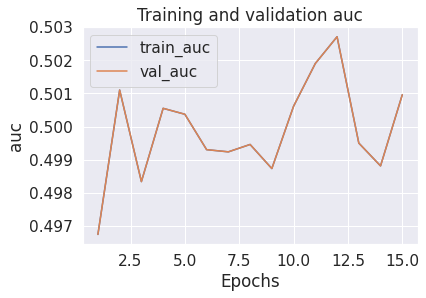

auc: 50.00%
Epoch 1/15
6300/6300 [==============================] - 20s 3ms/step - loss: 7626.0664 - auc: 0.5035 - val_loss: 0.3702 - val_auc: 0.5000
Epoch 2/15
6300/6300 [==============================] - 19s 3ms/step - loss: 3.1265 - auc: 0.5004 - val_loss: 0.3701 - val_auc: 0.5000
Epoch 3/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.5880 - auc: 0.4994 - val_loss: 0.3701 - val_auc: 0.5000
Epoch 4/15
6300/6300 [==============================] - 20s 3ms/step - loss: 0.3795 - auc: 0.4986 - val_loss: 0.3701 - val_auc: 0.5000
Epoch 5/15
6300/6300 [==============================] - 20s 3ms/step - loss: 0.3764 - auc: 0.4992 - val_loss: 0.3701 - val_auc: 0.5000
Epoch 6/15
6300/6300 [==============================] - 20s 3ms/step - loss: 0.4375 - auc: 0.4995 - val_loss: 0.3701 - val_auc: 0.5000
Epoch 7/15
6300/6300 [==============================] - 20s 3ms/step - loss: 0.6965 - auc: 0.4999 - val_loss: 0.3701 - val_auc: 0.5000
Epoch 8/15
6300/6300 [==================

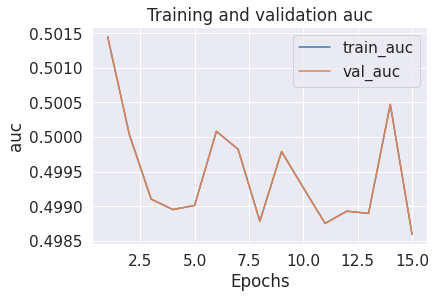

auc: 50.00%
Epoch 1/15
6300/6300 [==============================] - 20s 3ms/step - loss: 12990.2721 - auc: 0.4979 - val_loss: 0.3740 - val_auc: 0.5000
Epoch 2/15
6300/6300 [==============================] - 19s 3ms/step - loss: 3.7558 - auc: 0.4983 - val_loss: 0.3740 - val_auc: 0.5000
Epoch 3/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.4464 - auc: 0.4987 - val_loss: 0.3740 - val_auc: 0.5000
Epoch 4/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.4976 - auc: 0.4996 - val_loss: 0.3740 - val_auc: 0.5000
Epoch 5/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.6499 - auc: 0.4993 - val_loss: 0.3740 - val_auc: 0.5000
Epoch 6/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.3973 - auc: 0.5005 - val_loss: 0.3740 - val_auc: 0.5000
Epoch 7/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.4476 - auc: 0.4977 - val_loss: 0.3740 - val_auc: 0.5000
Epoch 8/15
6300/6300 [=================

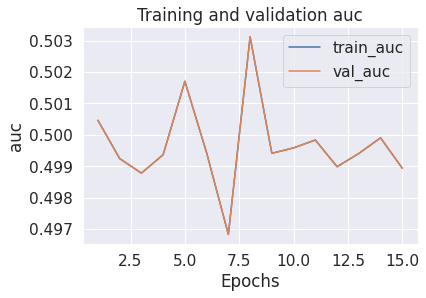

auc: 50.00%
Epoch 1/15
6300/6300 [==============================] - 20s 3ms/step - loss: 14190.3557 - auc: 0.4954 - val_loss: 0.3741 - val_auc: 0.5000
Epoch 2/15
6300/6300 [==============================] - 19s 3ms/step - loss: 4.9719 - auc: 0.5004 - val_loss: 0.3741 - val_auc: 0.5000
Epoch 3/15
6300/6300 [==============================] - 19s 3ms/step - loss: 2.7770 - auc: 0.4975 - val_loss: 0.3741 - val_auc: 0.5000
Epoch 4/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.3849 - auc: 0.4982 - val_loss: 0.3741 - val_auc: 0.5000
Epoch 5/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.3713 - auc: 0.4984 - val_loss: 0.3741 - val_auc: 0.5000
Epoch 6/15
6300/6300 [==============================] - 19s 3ms/step - loss: 0.3733 - auc: 0.4989 - val_loss: 0.3741 - val_auc: 0.5000
Epoch 7/15
6300/6300 [==============================] - 20s 3ms/step - loss: 0.3733 - auc: 0.4974 - val_loss: 0.3741 - val_auc: 0.5000
Epoch 8/15
6300/6300 [=================

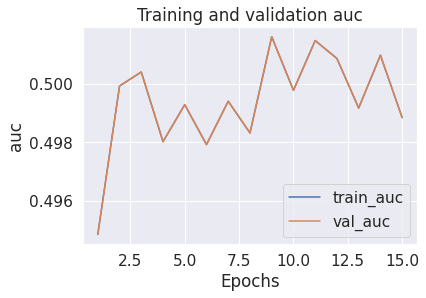

auc: 50.00%
50.00% (+/- 0.00%)


In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cvscores = []
for train, test in kfold.split(X_train, y_train):
  # create model
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(24,)))
  model.add(Dropout(0.3))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
  # Fit the model
  history = model.fit(X_train.loc[train], y_train.loc[train], validation_data=(X_train.loc[test], y_train.loc[test]), epochs=15, batch_size=32, verbose=1)

  #plot progress
  plot_metric(history, 'auc')

  # evaluate the model
  scores = model.evaluate(X_train.loc[test], y_train.loc[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))